In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.sparse import csr_matrix
from fuzzywuzzy import process

In [2]:
# Load the data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
genres = pd.read_csv('movies.csv', usecols=['movieId', 'genres'])

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Clean the data
ratings.drop(['timestamp'], axis=1, inplace=True)

In [8]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
# Merge the data sets on the 'movieId' column
# Now you have a DataFrame containing data from both 'movies' and 'ratings'
# The 'movieId' column serves as the key to merge the data sets.
data_frame = pd.merge(movies, ratings, on='movieId')

# Select features to be focused on
data_frame = data_frame[['movieId', 'userId', 'title', 'rating']]

In [10]:
data_frame

,movieId,userId,title,rating
0,1,1,Toy Story (1995),4.0
1,1,5,Toy Story (1995),4.0
2,1,7,Toy Story (1995),4.5
3,1,15,Toy Story (1995),2.5
4,1,17,Toy Story (1995),4.5
...,...,...,...,...
100831,193581,184,Black Butler: Book of the Atlantic (2017),4.0
100832,193583,184,No Game No Life: Zero (2017),3.5
100833,193585,184,Flint (2017),3.5
100834,193587,184,Bungo Stray Dogs: Dead Apple (2018),3.5


In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   userId   100836 non-null  int64  
 2   title    100836 non-null  object 
 3   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [12]:
# just cross checking if there are any null values.
data_frame.isnull().sum()

movieId    0
userId     0
title      0
rating     0
dtype: int64

In [13]:
# check for duplicates : No duplicate records
data_frame.duplicated().value_counts()

False    100836
dtype: int64

In [14]:
data_frame['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [15]:
data_frame['title'].value_counts()

Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
We're Back! A Dinosaur's Story (1993)      1
American Hardcore (2006)                   1
Shanghai Surprise (1986)                   1
Let's Get Harry (1986)                     1
Andrew Dice Clay: Dice Rules (1991)        1
Name: title, Length: 9719, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as miss

<Axes: >

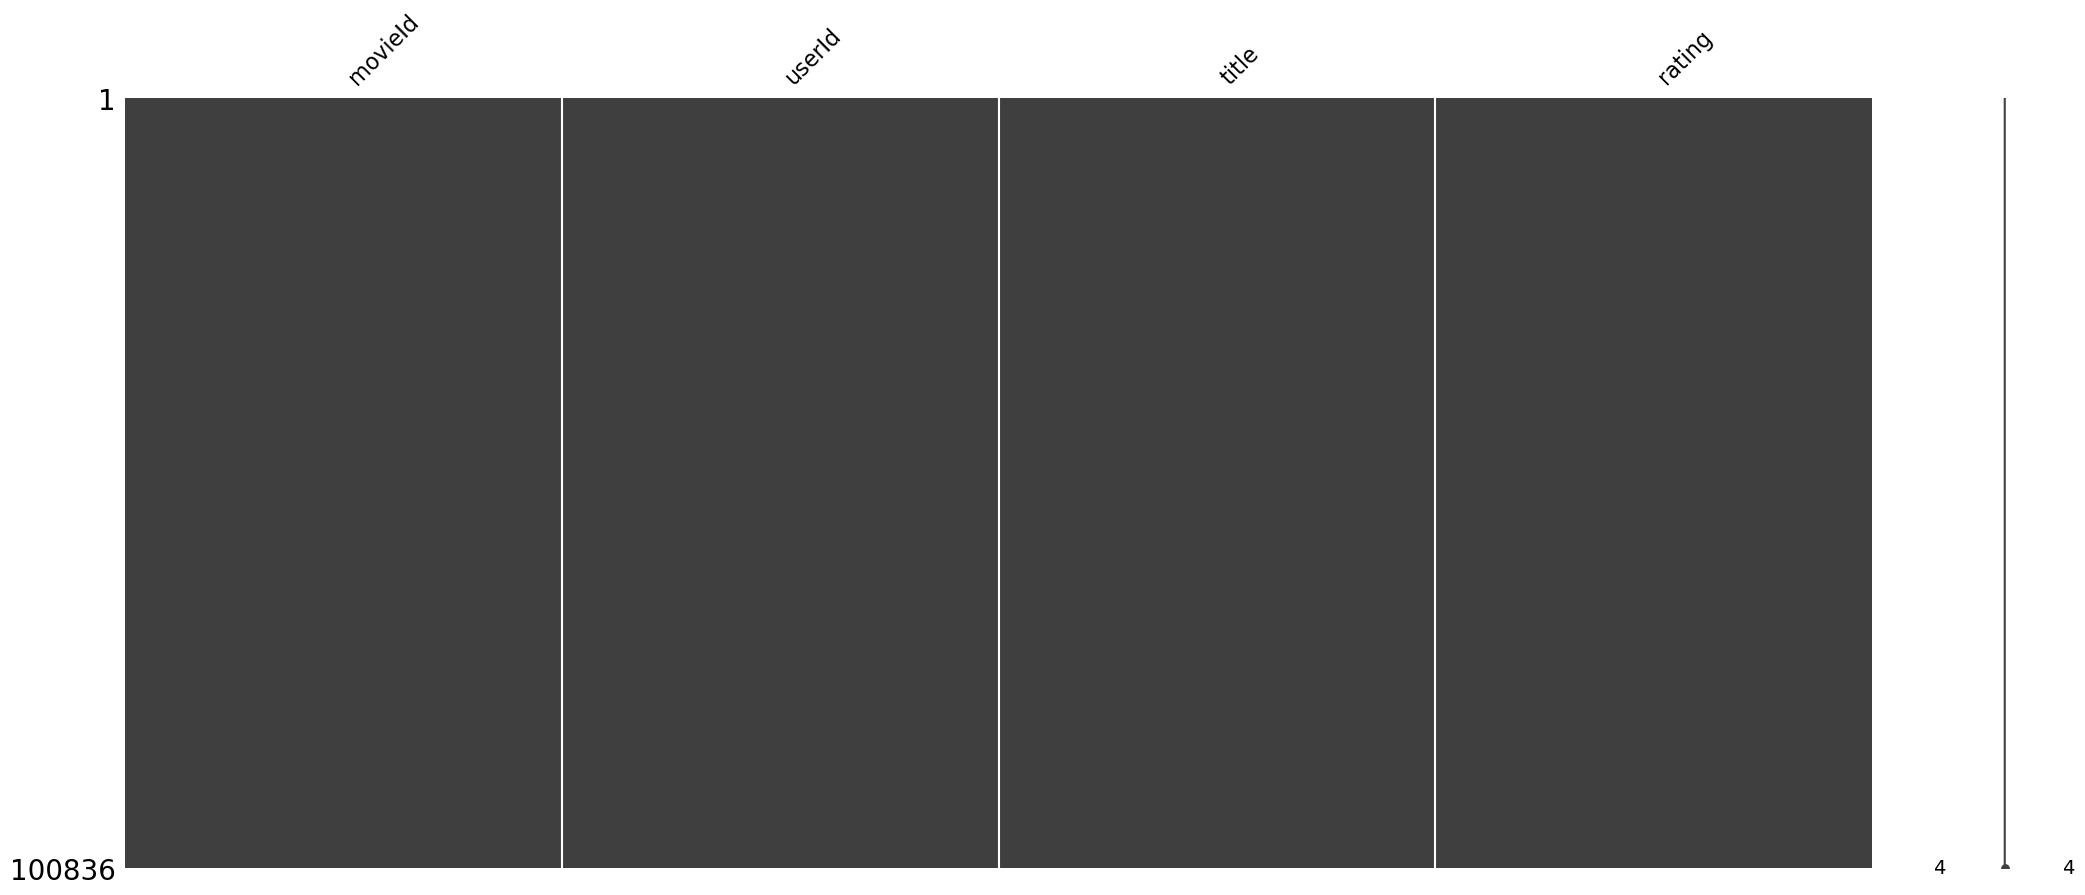

In [17]:
miss.matrix(data_frame)

array([[<Axes: title={'center': 'movieId'}>,
        <Axes: title={'center': 'userId'}>],
       [<Axes: title={'center': 'rating'}>, <Axes: >]], dtype=object)

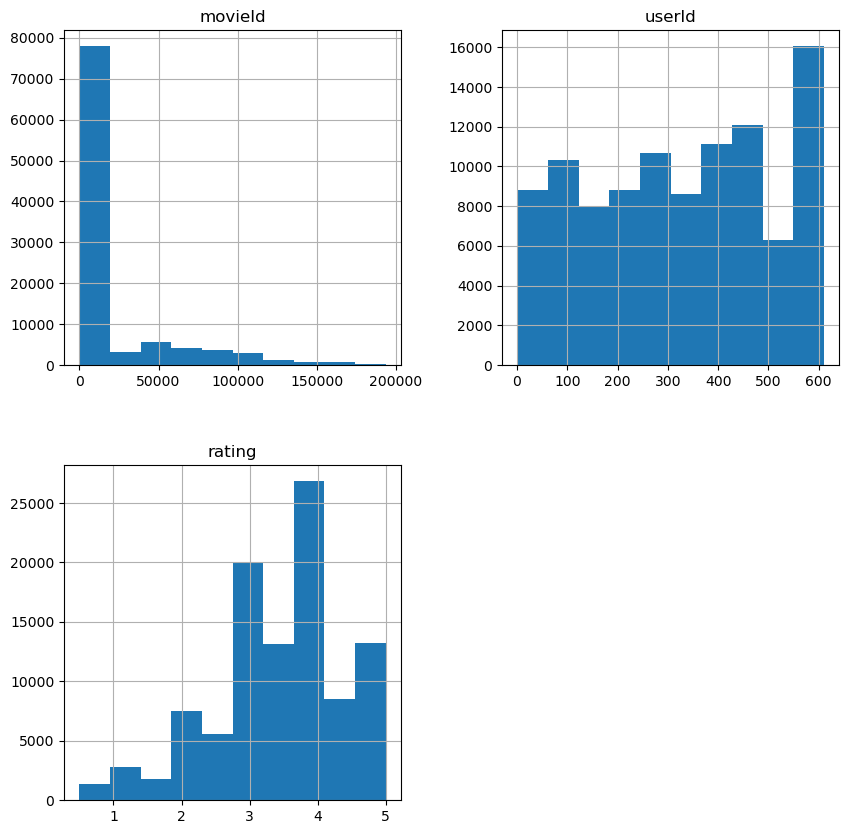

In [18]:
data_frame.hist(figsize=[10,10]) 
#numeric columns

<Axes: xlabel='rating', ylabel='count'>

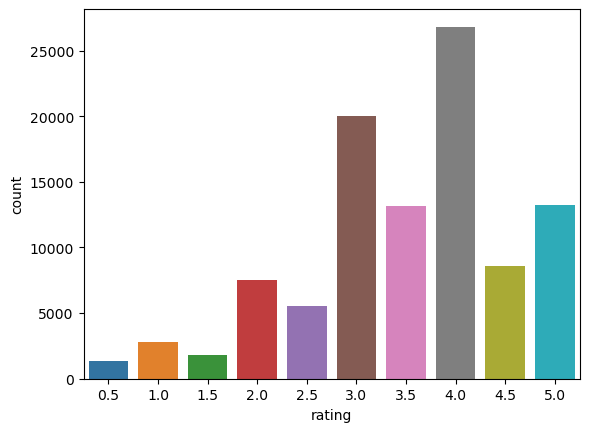

In [19]:
sns.countplot(data = data_frame, x='rating')

C:\Users\hurai\AppData\Local\Temp\ipykernel_10368\4240755014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_frame.corr()>0.4, cmap ='RdYlGn', annot = True)


<Axes: >

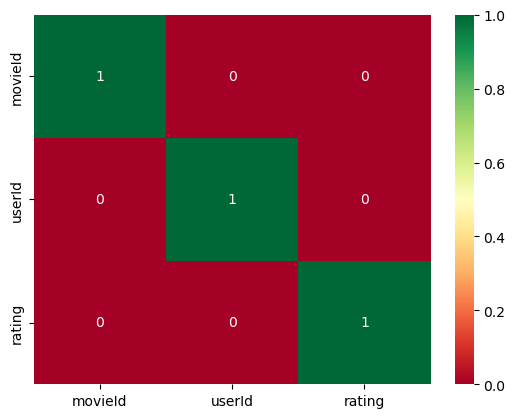

In [20]:
sns.heatmap(data_frame.corr()>0.4, cmap ='RdYlGn', annot = True)

<Axes: >

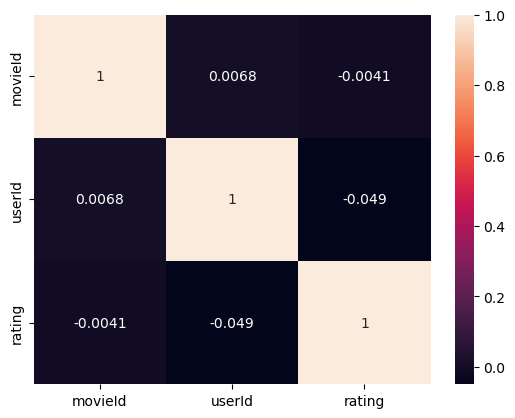

In [21]:
df_heatmap = data_frame[['movieId', 'userId', 'rating']].corr()
sns.heatmap(df_heatmap, annot = True)

In [25]:
corr_matrix = data_frame.pivot_table(index='title', columns='userId', values='rating').corr()

In [26]:
corr_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.000000,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.066378,0.583333,-0.791334,0.144603,0.244321,-0.049192,0.137771,0.253582,0.572700,-0.382955,...,0.290490,1.406134e-01,0.318473,0.682949,0.167062,1.000000,0.114191,0.240842,0.533002,0.389185
607,0.174557,NaN,-0.333333,0.116518,0.231080,0.255639,0.402792,0.251280,NaN,-0.241121,...,0.698241,2.172105e-01,0.192787,0.035806,-0.299641,0.114191,1.000000,0.200814,0.190117,0.106605
608,0.268070,-0.125000,-0.395092,-0.170501,-0.020546,0.125428,0.008081,0.434423,0.336625,-0.571043,...,0.473967,2.976461e-01,0.086423,0.053986,-0.075673,0.240842,0.200814,1.000000,0.488929,0.147606


In [27]:
corr_matrix = data_frame.pivot_table(index='title', columns='userId', values='rating').corr().fillna(0)

In [28]:
corr_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.991241,0.000000,0.000000,0.037796,...,-0.387347,0.000000e+00,-1.000000,0.000000,0.000000,0.583333,0.000000,-0.125000,0.000000,0.623288
3,0.079819,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.433200,0.000000,0.000000,-0.791334,-0.333333,-0.395092,0.000000,0.569562
4,0.207983,0.000000,0.000000,1.000000,-0.336525,0.148498,0.542861,0.117851,0.000000,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,0.000000,0.000000,-0.336525,1.000000,0.043166,0.158114,0.028347,0.000000,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.066378,0.583333,-0.791334,0.144603,0.244321,-0.049192,0.137771,0.253582,0.572700,-0.382955,...,0.290490,1.406134e-01,0.318473,0.682949,0.167062,1.000000,0.114191,0.240842,0.533002,0.389185
607,0.174557,0.000000,-0.333333,0.116518,0.231080,0.255639,0.402792,0.251280,0.000000,-0.241121,...,0.698241,2.172105e-01,0.192787,0.035806,-0.299641,0.114191,1.000000,0.200814,0.190117,0.106605
608,0.268070,-0.125000,-0.395092,-0.170501,-0.020546,0.125428,0.008081,0.434423,0.336625,-0.571043,...,0.473967,2.976461e-01,0.086423,0.053986,-0.075673,0.240842,0.200814,1.000000,0.488929,0.147606


In [30]:
movies_users = data_frame.pivot_table(index='title', columns='userId', values='rating').fillna(0)

In [31]:
movies_users

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [32]:
mat_movies_users = csr_matrix(movies_users.values)

In [33]:
mat_movies_users

<9719x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.neighbors import NearestNeighbors
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

In [39]:
model_nn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [58]:
# Enlist the Movies w.r.t the collaborative filtering properties filters
def get_recommendations(movie_name, n_recommendations=10):
    idx = process.extractOne(movie_name, movies['title'])[2]
    distances, indices = model_nn.kneighbors(mat_movies_users[idx], n_neighbors=n_recommendations+1)
    rec_movies = [(movies_users.index[indices.flatten()[i]], 
                   genres.loc[genres['movieId'] == movies.loc[movies['title'] == movies_users.index[indices.flatten()[i]]].iloc[0]['movieId']]['genres'].iloc[0], 
                   movies_users.iloc[indices.flatten()[i]].values.sum(), 
                   distances.flatten()[i]) 
                  for i in range(1, len(indices.flatten()))]
    return rec_movies

In [59]:
rec_movies = get_recommendations("The Dark Knight", n_recommendations=10)

for movie_title, genre, average_rating, distance in rec_movies:
    print("Movie Title:", movie_title)
    print("Genre:", genre)
    print("Average Rating:", average_rating)
    print("Distance:", distance)
    print("-----------------------")


Movie Title: Ewoks: The Battle for Endor (1985)
Genre: Adventure|Children|Fantasy|Sci-Fi
Average Rating: 6.0
Distance: 4.534838902170435e-05
-----------------------
Movie Title: Flesh & Blood (1985)
Genre: Action|Adventure|Drama|War
Average Rating: 6.0
Distance: 4.534838902170435e-05
-----------------------
Movie Title: Police Story 2 (Ging chaat goo si juk jaap) (1988)
Genre: Action|Comedy|Crime|Thriller
Average Rating: 7.5
Distance: 0.00025816445505744134
-----------------------
Movie Title: Wheels on Meals (Kuai can che) (1984)
Genre: Action|Comedy|Crime|Romance
Average Rating: 7.5
Distance: 0.00025816445505744134
-----------------------
Movie Title: Who Am I? (Wo shi shei) (1998)
Genre: Action|Adventure|Comedy|Sci-Fi|Thriller
Average Rating: 7.0
Distance: 0.0005370569667706437
-----------------------
Movie Title: Blood: The Last Vampire (2000)
Genre: Action|Animation|Horror
Average Rating: 6.5
Distance: 0.0013582861687200243
-----------------------
Movie Title: Tree of Life, The (2

In [60]:
def get_recommendations(movie_name, n_recommendations=10):
    # ... (existing code for get_recommendations) ...

    # Extract the ratings of the recommended movies from the 'rec_movies' list
    recommended_ratings = [movie[2] for movie in rec_movies]

    # Calculate min, average, and max ratings
    min_rating = min(recommended_ratings)
    avg_rating = sum(recommended_ratings) / len(recommended_ratings)
    max_rating = max(recommended_ratings)

    return rec_movies, min_rating, avg_rating, max_rating


In [61]:
recommendations, min_rating, avg_rating, max_rating = get_recommendations("The Dark Knight", n_recommendations=10)

print("Movie Recommendations:")
for movie in recommendations:
    print(f"Movie: {movie[0]} | Genre: {movie[1]} | Rating: {movie[2]} | Distance: {movie[3]}")

print("Minimum Rating:", min_rating)
print("Average Rating:", avg_rating)
print("Maximum Rating:", max_rating)


Movie Recommendations:
Movie: Ewoks: The Battle for Endor (1985) | Genre: Adventure|Children|Fantasy|Sci-Fi | Rating: 6.0 | Distance: 4.534838902170435e-05
Movie: Flesh & Blood (1985) | Genre: Action|Adventure|Drama|War | Rating: 6.0 | Distance: 4.534838902170435e-05
Movie: Police Story 2 (Ging chaat goo si juk jaap) (1988) | Genre: Action|Comedy|Crime|Thriller | Rating: 7.5 | Distance: 0.00025816445505744134
Movie: Wheels on Meals (Kuai can che) (1984) | Genre: Action|Comedy|Crime|Romance | Rating: 7.5 | Distance: 0.00025816445505744134
Movie: Who Am I? (Wo shi shei) (1998) | Genre: Action|Adventure|Comedy|Sci-Fi|Thriller | Rating: 7.0 | Distance: 0.0005370569667706437
Movie: Blood: The Last Vampire (2000) | Genre: Action|Animation|Horror | Rating: 6.5 | Distance: 0.0013582861687200243
Movie: Tree of Life, The (2011) | Genre: Drama | Rating: 8.0 | Distance: 0.002470481564570637
Movie: Project A ('A' gai waak) (1983) | Genre: Action|Comedy | Rating: 8.0 | Distance: 0.002470481564570637